In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
accepted = pd.read_csv("accepted_2007_to_2018Q4.csv", sep=',')

/Users/CorbanChiu/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
accepted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [4]:
accepted.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
sample_features = ['loan_amnt', 'term', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
                   'issue_d', 'purpose', 'zip_code', 'dti', 'earliest_cr_line', 'fico_range_low', 'fico_range_high',
                   'initial_list_status', 'application_type', 'pub_rec_bankruptcies', 'tax_liens',
                   'tot_hi_cred_lim', 'total_bal_ex_mort', 'int_rate']

features = accepted[sample_features]
features = features.dropna()
features

,loan_amnt,term,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,zip_code,dti,earliest_cr_line,fico_range_low,fico_range_high,initial_list_status,application_type,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,int_rate
0,3600.0,36 months,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,debt_consolidation,190xx,5.91,Aug-2003,675.0,679.0,w,Individual,0.0,0.0,178050.0,7746.0,13.99
1,24700.0,36 months,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,small_business,577xx,16.06,Dec-1999,715.0,719.0,w,Individual,0.0,0.0,314017.0,39475.0,11.99
2,20000.0,60 months,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,home_improvement,605xx,10.78,Aug-2000,695.0,699.0,w,Joint App,0.0,0.0,218418.0,18696.0,10.78
3,35000.0,60 months,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,debt_consolidation,076xx,17.06,Sep-2008,785.0,789.0,w,Individual,0.0,0.0,381215.0,52226.0,14.85
4,10400.0,60 months,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,major_purchase,174xx,25.37,Jun-1998,695.0,699.0,w,Individual,0.0,0.0,439570.0,95768.0,22.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260694,24000.0,60 months,7 years,MORTGAGE,95000.0,Source Verified,Oct-2016,home_improvement,356xx,19.61,Dec-1999,665.0,669.0,f,Individual,0.0,0.0,102517.0,104422.0,12.79
2260695,24000.0,60 months,10+ years,MORTGAGE,108000.0,Not Verified,Oct-2016,debt_consolidation,840xx,34.94,Feb-1991,695.0,699.0,f,Individual,0.0,1.0,227883.0,140118.0,10.49
2260696,40000.0,60 months,9 years,MORTGAGE,227000.0,Verified,Oct-2016,debt_consolidation,907xx,12.75,Feb-1995,705.0,709.0,f,Individual,0.0,0.0,55970.0,28398.0,10.49
2260697,24000.0,60 months,6 years,RENT,110000.0,Not Verified,Oct-2016,debt_consolidation,334xx,18.30,Jul-1999,660.0,664.0,f,Individual,1.0,0.0,84664.0,62426.0,14.49


In [6]:
# data processing
features['emp_length'] = features['emp_length'].astype(str).str.extract('(\d+)', expand=False).astype(float)
features['term'] = features['term'].astype(str).str.extract('(\d+)', expand=False).astype(float)
features['verification_status'].replace({'Not Verified': 0, 'Source Verified': 1, 'Verified': 1}, inplace=True)
features['earliest_cr_line'] = pd.to_datetime(features['earliest_cr_line'], format='%b-%Y')
features['issue_d'] = pd.to_datetime(features['issue_d'], format='%b-%Y')
diff = (features['issue_d'] - features['earliest_cr_line']).dt.days // 30
features['credit_length_months'] = diff.astype(int)
features['zip_code'] = features['zip_code'].astype(str).str.extract('(\d+)', expand=False).astype(float)
features['fico_score'] = (features['fico_range_low'] + features['fico_range_high'])/2
features['initial_list_status'].replace({'w': 1, 'f': 0}, inplace=True)
features['application_type'].replace({'Individual': 1, 'Joint App': 2}, inplace=True)

In [7]:
features

,loan_amnt,term,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,zip_code,dti,...,fico_range_high,initial_list_status,application_type,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,int_rate,credit_length_months,fico_score
0,3600.0,36.0,10.0,MORTGAGE,55000.0,0,2015-12-01,debt_consolidation,190.0,5.91,...,679.0,1,1,0.0,0.0,178050.0,7746.0,13.99,150,677.0
1,24700.0,36.0,10.0,MORTGAGE,65000.0,0,2015-12-01,small_business,577.0,16.06,...,719.0,1,1,0.0,0.0,314017.0,39475.0,11.99,194,717.0
2,20000.0,60.0,10.0,MORTGAGE,63000.0,0,2015-12-01,home_improvement,605.0,10.78,...,699.0,1,2,0.0,0.0,218418.0,18696.0,10.78,186,697.0
3,35000.0,60.0,10.0,MORTGAGE,110000.0,1,2015-12-01,debt_consolidation,76.0,17.06,...,789.0,1,1,0.0,0.0,381215.0,52226.0,14.85,88,787.0
4,10400.0,60.0,3.0,MORTGAGE,104433.0,1,2015-12-01,major_purchase,174.0,25.37,...,699.0,1,1,0.0,0.0,439570.0,95768.0,22.45,213,697.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260694,24000.0,60.0,7.0,MORTGAGE,95000.0,1,2016-10-01,home_improvement,356.0,19.61,...,669.0,0,1,0.0,0.0,102517.0,104422.0,12.79,204,667.0
2260695,24000.0,60.0,10.0,MORTGAGE,108000.0,0,2016-10-01,debt_consolidation,840.0,34.94,...,699.0,0,1,0.0,1.0,227883.0,140118.0,10.49,312,697.0
2260696,40000.0,60.0,9.0,MORTGAGE,227000.0,1,2016-10-01,debt_consolidation,907.0,12.75,...,709.0,0,1,0.0,0.0,55970.0,28398.0,10.49,263,707.0
2260697,24000.0,60.0,6.0,RENT,110000.0,0,2016-10-01,debt_consolidation,334.0,18.30,...,664.0,0,1,1.0,0.0,84664.0,62426.0,14.49,210,662.0


In [8]:
import seaborn as sns

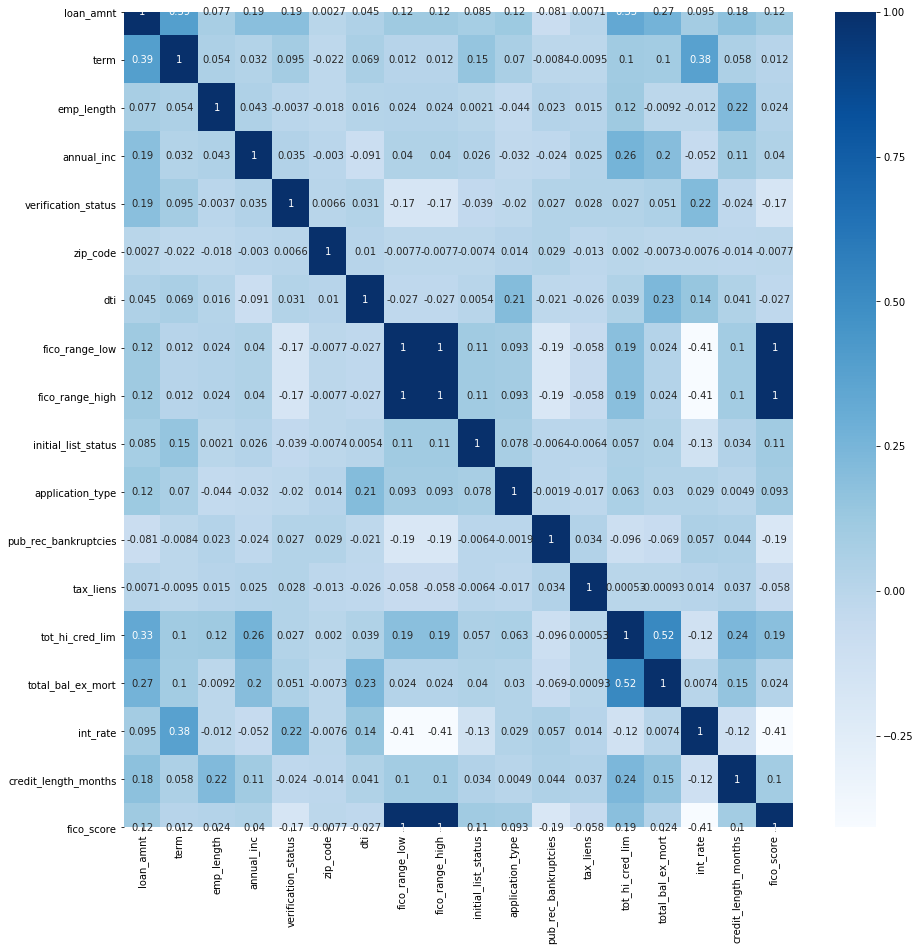

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(features.corr(), annot=True, cmap='Blues')

In [10]:
dummies = ['purpose', 'home_ownership']
features = pd.get_dummies(features, columns=dummies, drop_first=True)

data = features.drop(['issue_d', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'int_rate'], axis=1)

In [11]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso

In [12]:
scaler = RobustScaler()
normalized_data = scaler.fit_transform(data)

In [13]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(normalized_data, features['int_rate'])

In [14]:
linreg = LinearRegression().fit(X_train, y_train)
mean_squared_error(y_test, linreg.predict(X_test))

14.051808139757311

In [15]:
min_params = (0, 0, 100)
tree_params = []

for depth in np.arange(6, 18, 1):
    for min_split in np.arange(5, 50, 5):
        trees = DecisionTreeRegressor(max_depth=depth, min_samples_split=min_split).fit(X_train, y_train)
        mse = mean_squared_error(y_test, trees.predict(X_test))
        tree_params.append((depth, min_split, mse))
        if mse < min_params[2]:
            min_params = (depth, min_split, mse)
            
min_params

(12, 45, 13.681366867779643)

In [16]:
tree_params

[(6, 5, 14.828423864621483),
 (6, 10, 14.828423864621485),
 (6, 15, 14.828423864621488),
 (6, 20, 14.82842386462149),
 (6, 25, 14.828423864621485),
 (6, 30, 14.828423864621483),
 (6, 35, 14.828423864621483),
 (6, 40, 14.828423864621481),
 (6, 45, 14.828423864621483),
 (7, 5, 14.482469939686608),
 (7, 10, 14.48246993968661),
 (7, 15, 14.482469939686608),
 (7, 20, 14.482469939686606),
 (7, 25, 14.482469939686608),
 (7, 30, 14.482469939686608),
 (7, 35, 14.482469939686608),
 (7, 40, 14.482469939686611),
 (7, 45, 14.482469939686604),
 (8, 5, 14.218914946841075),
 (8, 10, 14.218914946841075),
 (8, 15, 14.218914946841075),
 (8, 20, 14.218914946841071),
 (8, 25, 14.218914946841075),
 (8, 30, 14.218914946841075),
 (8, 35, 14.218914946841076),
 (8, 40, 14.218914946841075),
 (8, 45, 14.218914946841073),
 (9, 5, 14.012880020720893),
 (9, 10, 14.012880020720893),
 (9, 15, 14.012880020720893),
 (9, 20, 14.012880020720889),
 (9, 25, 14.012880020720893),
 (9, 30, 14.012861496109618),
 (9, 35, 14.0128

In [28]:
min_params = (0, 100)
ridge_params = []

for a in np.arange(1, 20, 1):
    ridge = Ridge(alpha = a).fit(X_train, y_train)
    mse = mean_squared_error(y_test, ridge.predict(X_test))
    ridge_params.append((a, mse))
    if mse < min_params[1]:
        min_params = (a, mse)
        
min_params

(7, 14.051699114228269)

In [29]:
ridge_params

[(1, 14.051734641636289),
 (2, 14.051714862225843),
 (3, 14.051706553928259),
 (4, 14.051702487802329),
 (5, 14.051700424654147),
 (6, 14.05169944781379),
 (7, 14.051699114228269),
 (8, 14.051699184806061),
 (9, 14.051699520098536),
 (10, 14.051700034027078),
 (11, 14.051700671170218),
 (12, 14.051701394707466),
 (13, 14.051702179607933),
 (14, 14.051703008581413),
 (15, 14.051703869568039),
 (16, 14.051704754125748),
 (17, 14.051705656363069),
 (18, 14.051706572214396),
 (19, 14.051707498937054)]

In [19]:
min_params = (0, 0, 100)
sgd_params = []

for a in np.arange(0.00001, 0.00021, 0.00001):
    for depth in np.arange(700, 1300, 100):
        sgd = SGDRegressor(alpha = a, max_iter = depth).fit(X_train, y_train)
        mse = mean_squared_error(y_test, sgd.predict(X_test))
        sgd_params.append((a, depth, mse))
        if mse < min_params[2]:
            min_params = (a, depth, mse)
            
min_params

(0.00017, 1200, 14.06568850402776)

In [20]:
sgd_params

[(1e-05, 700, 14.33399917937696),
 (1e-05, 800, 14.074225568215939),
 (1e-05, 900, 14.213602458567866),
 (1e-05, 1000, 14.345347421064544),
 (1e-05, 1100, 1587032.328243796),
 (1e-05, 1200, 15.146837017669743),
 (2e-05, 700, 15.94388346950902),
 (2e-05, 800, 14.084440883436823),
 (2e-05, 900, 14.196978896834258),
 (2e-05, 1000, 14.095616662814313),
 (2e-05, 1100, 14.16366538224978),
 (2e-05, 1200, 14.190789599082178),
 (3.0000000000000004e-05, 700, 14.569003380943034),
 (3.0000000000000004e-05, 800, 25.784180472142328),
 (3.0000000000000004e-05, 900, 14.102287569670935),
 (3.0000000000000004e-05, 1000, 14.207149843981924),
 (3.0000000000000004e-05, 1100, 14.124834037166597),
 (3.0000000000000004e-05, 1200, 14.145884103123318),
 (4e-05, 700, 14.522900019582204),
 (4e-05, 800, 14.777878245147448),
 (4e-05, 900, 14.112518759968676),
 (4e-05, 1000, 14.120442866860182),
 (4e-05, 1100, 14.168304673407976),
 (4e-05, 1200, 14.246918915018751),
 (5e-05, 700, 14.2245480435054),
 (5e-05, 800, 14.

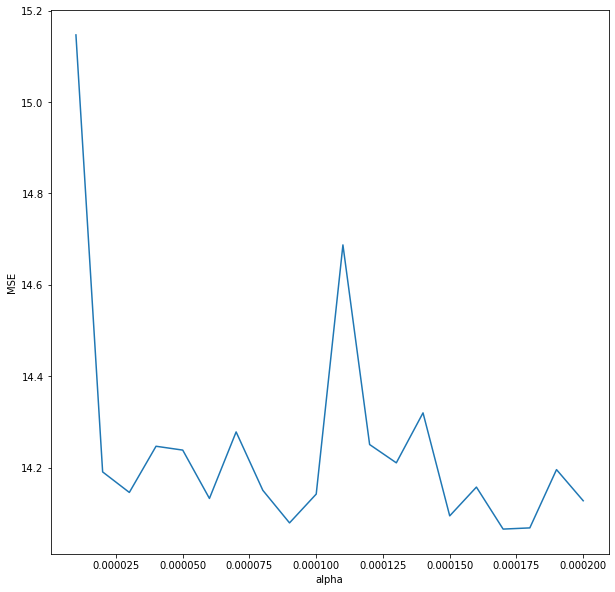

In [34]:
alphas = []
mses = []
for i in sgd_params:
    if i[1] == 1200:
        alphas.append(i[0])
        mses.append(i[2])

plt.figure(figsize=(10,10))        
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.plot(alphas, mses)

In [21]:
min_params = (0, 0, 100)
lasso_params = []

for a in np.arange(0.05, 5, 0.05):
    for depth in np.arange(700, 1300, 100):
        lasso = Lasso(alpha = a, max_iter = depth).fit(X_train, y_train)
        mse = mean_squared_error(y_test, lasso.predict(X_test))
        lasso_params.append((a, depth, mse))
        if mse < min_params[2]:
            min_params = (a, depth, mse)
            
min_params

(0.05, 700, 14.307171409924475)

In [22]:
lasso_params

[(0.05, 700, 14.307171409924475),
 (0.05, 800, 14.307171409924475),
 (0.05, 900, 14.307171409924475),
 (0.05, 1000, 14.307171409924475),
 (0.05, 1100, 14.307171409924475),
 (0.05, 1200, 14.307171409924475),
 (0.1, 700, 14.624285910842984),
 (0.1, 800, 14.624285910842984),
 (0.1, 900, 14.624285910842984),
 (0.1, 1000, 14.624285910842984),
 (0.1, 1100, 14.624285910842984),
 (0.1, 1200, 14.624285910842984),
 (0.15000000000000002, 700, 14.914443522271975),
 (0.15000000000000002, 800, 14.914443522271975),
 (0.15000000000000002, 900, 14.914443522271975),
 (0.15000000000000002, 1000, 14.914443522271975),
 (0.15000000000000002, 1100, 14.914443522271975),
 (0.15000000000000002, 1200, 14.914443522271975),
 (0.2, 700, 15.3184810033478),
 (0.2, 800, 15.3184810033478),
 (0.2, 900, 15.3184810033478),
 (0.2, 1000, 15.3184810033478),
 (0.2, 1100, 15.3184810033478),
 (0.2, 1200, 15.3184810033478),
 (0.25, 700, 15.83637920540657),
 (0.25, 800, 15.83637920540657),
 (0.25, 900, 15.83637920540657),
 (0.25,

In [23]:
min_params = (0, 0, 100)
randf_params = []

for num_trees in np.arange(8, 15, 1):
    for depth in np.arange(12, 20, 1):
        for nums in np.arange(100000, 600000, 100000):
            randf = RandomForestRegressor(n_estimators = num_trees, max_depth = depth).fit(X_train, y_train)
            mse = mean_squared_error(y_test, randf.predict(X_test))
            randf_params.append((num_trees, depth, mse))
            if mse < min_params[2]:
                min_params = (num_trees, depth, mse)

min_params

KeyboardInterrupt: 

In [24]:
min_params

(14, 15, 13.100365474708148)

In [25]:
randf_params

[(8, 12, 13.313575456463575),
 (8, 12, 13.29271000612248),
 (8, 12, 13.305229073131912),
 (8, 12, 13.294438224267394),
 (8, 12, 13.315286083936998),
 (8, 13, 13.240264510191667),
 (8, 13, 13.242634836935464),
 (8, 13, 13.225401171508304),
 (8, 13, 13.235181491458675),
 (8, 13, 13.237121461440776),
 (8, 14, 13.208600150629055),
 (8, 14, 13.197198547468059),
 (8, 14, 13.197282937219091),
 (8, 14, 13.204369558555426),
 (8, 14, 13.198183877275236),
 (8, 15, 13.211385940521357),
 (8, 15, 13.208281594107067),
 (8, 15, 13.194260518355042),
 (8, 15, 13.199346848933818),
 (8, 15, 13.219065840186891),
 (8, 16, 13.253249602983693),
 (8, 16, 13.242790792538573),
 (8, 16, 13.252667584841904),
 (8, 16, 13.25177214042321),
 (8, 16, 13.252614580335196),
 (8, 17, 13.303985967728002),
 (8, 17, 13.305382374283914),
 (8, 17, 13.300623672485562),
 (8, 17, 13.298752873907054),
 (8, 17, 13.306029460874331),
 (8, 18, 13.391421833513876),
 (8, 18, 13.389744221853022),
 (8, 18, 13.389818686317138),
 (8, 18, 13.

In [ ]:
nn = MLPRegressor().fit(X_train, y_train)
mean_squared_error(y_test, nn.predict(X_test))